# Aριθμητική Ανάλυση - 3ο Σετ 
## Κουρτέσης Δημήτρης - ΑΕΜ:15754

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scienceplots # pip install scienceplots
plt.style.use(["science", "notebook", "grid"])
plt.rcParams["text.usetex"] = True

### Άσκηση 2:

Να υπολογιστεί το ολοκλήρωμα,
$$ I=\int\limits_{-3/2}^{3/2}f(x)dx,$$
όπου,
$$f(x)=10e^{-5|x|}-\frac{0.1}{(x-1)^{2}+0.001}+4cos(6x)$$

In [2]:
# Ορισμός της συνάρτησης f(x).

def f(x):
    return 10*np.exp(-5*np.abs(x)) - 0.1/((x-1)**2 + 0.001) + 4*np.cos(6*x)

$α)$ Χρησιμοποιείται ο κανόνας του τραπεζίου, ο οποίος αποδίδεται στη μορφή,
$$\int\limits_{a}^{b}f(x)dx=\frac{h}{2}\left(f_0+2f_1+...+2f_{n-1}+f_{n}\right)$$
και έχει σφάλμα,
$$Ε=-\frac{h^{2}}{12}(b-a)f^{(2)}(\xi),a\leq\xi\leq b$$

In [3]:
def trapezoidal(a, b, n, f):
    
    h = (b - a) / n
    
    integral = f(a) + f(b)
    
    for i in range(1, n):
        xn = a + i*h
        integral += 2*f(xn)
    
    integral *= h/2
    
    return integral 

$β)$ Χρησιμοποιείται ο κανόνας του Simpson. Για άρτιο αριθμό υποδιαιρέσεων γράφεται ως,
$$\int\limits_{a}^{b}f(x)dx=\frac{h}{3}(f_1+4f_2+2f_3+...+2f_{n-2}+4f_{n-1}+f_{n}),$$
και έχει σφάλμα,
$$Ε=-\frac{b-a}{180}h^{4}f^{(4)}(\xi),a\leq\xi\leq b$$

In [4]:
def simpson(a, b, n, f):
    h = (b - a) / n
    
    integral = f(a) + f(b)
    
    for i in range(1, n):
        xn = a + i*h
        
        if i%2 == 0: integral += 2*f(xn)
        else: integral += 4*f(xn)
            
    integral *= (h/3)
    
    return integral

$γ)$ Χρησιμοποιείται η βελτίωση Romerg, όπου, εφόσον έχουν υπολογισθεί δύο ολοκληρώματα με την ίδια μέθοδο για διαφορετικά βήματα $h_{1}$ και $h_{2}$, αν οριστεί το κλάσμα $k=h_{2}/h_{1}$, το ολοκλήρωμα παίρνει την τιμή,
$$Ι=\frac{k^{2}I_{1}-I_{2}}{k^{2}-1}.$$

In [5]:
# Μέθοδος Romberg για τραπεζοειδή ολοκληρώματα.

def romberg(a, b, k, n1, f):
    h1 = (b - a) / n1
    h2 = k*h1
    n2 = int((b - a)/h2)
    
    I1 = trapezoidal(a, b, n1, f)
    I2 = trapezoidal(a, b, n2, f)
    
    return ((k**2)*I1 - I2)/(k**2 - 1)

Τελικά, αποδίδονται οι λύσεις που προκύπτουν με τις τρείς μεθόδους για διάφορες υποδιαιρέσεις n. 

In [6]:
# Λίστες με τα τελικά δεδομένα για διαφορετικό αριθμό υποδιαιρέσεων n.

a = -3/2 ; b = 3/2 

n1 = np.arange(2, 2001, 1)
solutions_trapezoidal = []
solutions_romberg = []

for i in range(len(n1)):
    solutions_trapezoidal.append(trapezoidal(a, b, n1[i], f))
for i in range(len(n1)):
    solutions_romberg.append(romberg(a, b, 1/3, n1[i], f))

n2 = np.arange(2, 2001, 2) # Άρτιος αριθμός υποδιαιρέσεων.
solutions_simpson = []

for i in range(len(n2)):
    solutions_simpson.append(simpson(a, b, n2[i], f))

In [7]:
for i in range(len(solutions_trapezoidal)):
    print("n = %i"%n1[i] + ". Trapezoidal calculation: %.12f"%solutions_trapezoidal[i])

n = 2. Trapezoidal calculation: 15.080861683210
n = 3. Trapezoidal calculation: -10.567263186254
n = 4. Trapezoidal calculation: 5.422838068795
n = 5. Trapezoidal calculation: -3.169732542960
n = 6. Trapezoidal calculation: -44.438017902266
n = 7. Trapezoidal calculation: -4.039676147766
n = 8. Trapezoidal calculation: 2.303607825048
n = 9. Trapezoidal calculation: 1.299407407320
n = 10. Trapezoidal calculation: 1.270627615820
n = 11. Trapezoidal calculation: -5.783026335451
n = 12. Trapezoidal calculation: -21.106945337352
n = 13. Trapezoidal calculation: -6.303702607727
n = 14. Trapezoidal calculation: -0.308090181868
n = 15. Trapezoidal calculation: -0.002848815803
n = 16. Trapezoidal calculation: -0.939050627972
n = 17. Trapezoidal calculation: -6.772522717441
n = 18. Trapezoidal calculation: -13.622573084692
n = 19. Trapezoidal calculation: -6.818039031011
n = 20. Trapezoidal calculation: -1.969105851090
n = 21. Trapezoidal calculation: -1.303441213253
n = 22. Trapezoidal calculat

In [8]:
for i in range(len(solutions_simpson)):
    print("n = %i"%n2[i] + ". Simpson calculation: %.12f"%solutions_simpson[i])

n = 2. Simpson calculation: 23.954007688907
n = 4. Simpson calculation: 2.203496863990
n = 6. Simpson calculation: -55.728269474270
n = 8. Simpson calculation: 1.263864410466
n = 10. Simpson calculation: 2.750747668747
n = 12. Simpson calculation: -13.329921149047
n = 14. Simpson calculation: 0.935771806765
n = 16. Simpson calculation: -2.019936778979
n = 18. Simpson calculation: -18.596566582029
n = 20. Simpson calculation: -3.049017006726
n = 22. Simpson calculation: -1.255423361786
n = 24. Simpson calculation: -6.477646916353
n = 26. Simpson calculation: -1.988134864502
n = 28. Simpson calculation: -4.351920465156
n = 30. Simpson calculation: -10.982026948977
n = 32. Simpson calculation: -4.731905824788
n = 34. Simpson calculation: -3.024481988302
n = 36. Simpson calculation: -4.948946767292
n = 38. Simpson calculation: -3.392160566777
n = 40. Simpson calculation: -5.162368339493
n = 42. Simpson calculation: -8.131864532342
n = 44. Simpson calculation: -5.272078641463
n = 46. Simpso

In [9]:
for i in range(len(solutions_romberg)):
    print("n = %i"%n1[i] + ". Romberg calculation: %.12f"%solutions_romberg[i])

n = 2. Romberg calculation: -51.877877850450
n = 3. Romberg calculation: 2.782741231517
n = 4. Romberg calculation: -24.423168263120
n = 5. Romberg calculation: 0.393011650092
n = 6. Romberg calculation: -9.770642482495
n = 7. Romberg calculation: -0.961411846439
n = 8. Romberg calculation: -11.689793939934
n = 9. Romberg calculation: -2.829155745116
n = 10. Romberg calculation: -9.425714919621
n = 11. Romberg calculation: -2.862109915725
n = 12. Romberg calculation: -5.368654347803
n = 13. Romberg calculation: -3.470753970543
n = 14. Romberg calculation: -7.189342267658
n = 15. Romberg calculation: -4.738962144194
n = 16. Romberg calculation: -6.614612744221
n = 17. Romberg calculation: -4.228974966550
n = 18. Romberg calculation: -4.707905465165
n = 19. Romberg calculation: -4.455331759468
n = 20. Romberg calculation: -5.954067627562
n = 21. Romberg calculation: -5.303289233727
n = 22. Romberg calculation: -5.762854752129
n = 23. Romberg calculation: -4.734402130581
n = 24. Romberg c

Παρατηρούμε ότι χρειάζονται πολλές επαναλήψεις για να σταθεροποιηθεί η τιμή που υπολογίζεται αριθμητικά, αλλά το ολοκλήρωμα αναμένεται να προσεγγίζει την τιμή $-5.1475$. Για να μελετήσουμε περισσότερο εποπτικά τον ρυθμό σύγκλισης της κάθε μεθόδου, χαράσσουμε ακολούθως διαγράμματα σφάλματος - αριθμού υποδιαιρέσεως $(\varepsilon(n))$ και για τις τρεις μεθόδους.

In [10]:
# Λίστες με το σφάλμα.

N1 = len(solutions_trapezoidal) ; N2 = len(solutions_simpson)
error_trapezoidal = [np.abs(solutions_trapezoidal[N1-1] - solutions_trapezoidal[0])]
error_simpson = [np.abs(solutions_simpson[N2-1] - solutions_simpson[0])]
error_romberg = [np.abs(solutions_romberg[N1-1] - solutions_romberg[0])]

for i in range(1, N1 - 1):
    error_trapezoidal.append(np.abs(solutions_trapezoidal[N1-1]-solutions_trapezoidal[i]))
    error_romberg.append(np.abs(solutions_romberg[N1-1] - solutions_romberg[i]))
for i in range(1, N2 - 1):
    error_simpson.append(np.abs(solutions_simpson[N2-1] - solutions_simpson[i]))

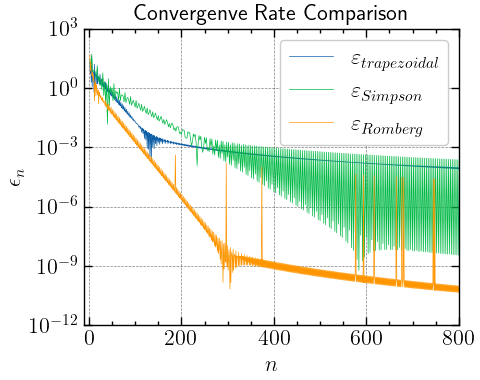

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)

ax.plot(n1[:len(n1)-1:1], error_trapezoidal, label=r"$\varepsilon_{trapezoidal}$")
ax.plot(n2[:len(n2)-1:1], error_simpson, label=r"$\varepsilon_{Simpson}$")
ax.plot(n1[:len(n1)-1:1], error_romberg, label=r"$\varepsilon_{Romberg}$")

ax.set_yscale("log")
ax.set_xlabel(r"$n$") ; ax.set_ylabel(r"$\epsilon_{n}$") ; ax.set_title(r"Convergenve Rate Comparison")
ax.legend(loc = "upper right") ; plt.rcParams["lines.linewidth"] = 0.5
ax.set_xlim(-10, 800) ; ax.set_ylim(10**(-12), 10**(3))
plt.show()

Φαίνεται ότι η μέθοδος Romberg συγκλίνει γρηγορότερα από τις άλλες δύο μεθόδους.

Επιπλέον, μελετάμε το ρυθμό σύγκλισης της κάθε μεθόδου μέσω της θεωρητικής σχέσης,
$$r=\frac{u_{2h}-u_{4h}}{u_{h}-u_{2h}}\approx 2^{\alpha},$$
όπου $\alpha$ είναι η τάξη της ευαισθησίας της μεθόδου ως προς το $h$. Έτσι, για τη μέθοδο τραπεζίου θα λαμβάνει την τιμή $α=2$ και για τη μέθοδο Simpson $α=4$.

In [13]:
Ν1 = len(solutions_trapezoidal) 

rate_tr = np.abs(solutions_trapezoidal[int((N1-1)/2) - 1] - solutions_trapezoidal[int((N1-1)/4) - 1]) / \
np.abs(solutions_trapezoidal[N1 - 1] - solutions_trapezoidal[int((N1-1)/2) - 1])
np.log2(rate_tr)

1.9999673851129032

In [28]:
N2 = len(solutions_simpson)

rate_si = np.abs(solutions_simpson[int((N2-1)/2)] - solutions_simpson[int((N2-1)/4)]) / \
np.abs(solutions_simpson[N2-1] - solutions_simpson[int((N2-1)/2)])
np.log2(rate_si)

4.1103236267923835

Προκύπτει ότι ο λογάριθμος $log_{2}(r)$ των ρυθμών σύγκλισης της κάθε μεθόδου προσεγγίζει πράγματι την ευαισθησία $\alpha$ της μεθόδου ως προς το $h$.

### Άσκηση 3:

$α)$ Να υπολογίσετε το ολοκλήρωμα,
$$\int\limits_{0}^{6\pi}e^{x-15}sin(12x)dx$$
με τη μέθοδο Filon για 5 σημεία. 

Ο γενικός τύπος για τη μέθοδο ολοκλήρωσης του Filon είναι,
$$\int\limits_{\alpha}^{b}y(x)sin(kx)dx\approx h[Ay(\alpha)cos(k\alpha)-Ay(b)cos(kb)+BS_{e}+DS_{o}],$$
όπου,
$$Α=\frac{1}{q}+\frac{sin(2q)}{2q^2}-\frac{2sin^{2}(q)}{q^3},$$
$$B=\frac{1}{q^2}+\frac{cos^{2}(q)}{q^2}-\frac{sin(2q)}{q^3},$$
$$D=\frac{4sin(q)}{q^3}-\frac{4cos(q)}{q^2},$$
$$S_{e}=-y(\alpha)sin(k\alpha)-y(b)sin(kb)+2\Sigma_{i=0}^{n}y(\alpha+2ih)sin(ka+2iq),$$
$$S_{o}=\Sigma_{i=1}^{n}y(\alpha+(2i-1)h)sin(k\alpha+(2i-1)q),$$
όπου $q=kh$. 
Αρκεί, λοιπόν, να εφαρμοστούν οι παραπάνω σχέσεις για $n=5$.

In [15]:
# Ορισμός της συνάρτησης f(x).

def f(x): return np.exp(x - 15)

In [16]:
def filon(a, b, n, k, f):
    h = (b-a)/(n-1)
    q = k*h
    
    A = (1/q) + (np.sin(2*q)/(2*q**2)) - ((2*(np.sin(q)**2))/(q**3))
    B =(1/q**2) + ((np.cos(q)**2)/(q**2)) - ((np.sin(2*q))/(q**3))
    D = ((4*np.sin(q))/(q**3)) - ((4*np.cos(q))/(q**2))
    
    S_e = -f(a)*np.sin(k*a) - f(b)*np.sin(k*b)
    S_o = 0
    
    for i in range(n+1):
        S_e += 2*f(a + 2*i*h)*np.sin(k*a + 2*i*q)
    for i in range(1, n+1):
        S_o += f(a + (2*i-1)*h)*np.sin(k*a + (2*i-1)*q)
    
    return h*(A*f(a)*np.cos(k*a) - A*f(b)*np.cos(k*b) +B*S_e + D*S_o)

In [17]:
a = 0 ; b = 6*np.pi ; n = 5 ; k = 12

solution_filon = filon(a, b, n, k, f)
solution_filon

-3.918282562975214

$β)$ Μελέτη του ρυθμού σύγκλισης για το ίδιο ολοκλήρωμα με τη μέθοδο Simpson.

In [18]:
def f(x): return np.exp(x - 15)*np.sin(12*x)

n2 = np.arange(2, 1000, 2)
solutions_simpson = []

for i in range(len(n2)):
    solutions_simpson.append(simpson(a, b, n2[i], f))

In [19]:
for i in range(len(solutions_simpson)):
    print("n = %i"%n2[i] + ". Simpson calculation: %.12f"%solutions_simpson[i])

n = 2. Simpson calculation: -0.000000000001
n = 4. Simpson calculation: -0.000000000001
n = 6. Simpson calculation: -0.000000000001
n = 8. Simpson calculation: -0.000000000000
n = 10. Simpson calculation: 9.616540463335
n = 12. Simpson calculation: -0.000000000001
n = 14. Simpson calculation: 8.620169319446
n = 16. Simpson calculation: -20.748786022022
n = 18. Simpson calculation: -0.000000000001
n = 20. Simpson calculation: 21.935461848064
n = 22. Simpson calculation: 14.331952058591
n = 24. Simpson calculation: -0.000000000000
n = 26. Simpson calculation: -12.736460508591
n = 28. Simpson calculation: -15.647055511625
n = 30. Simpson calculation: -18.773801584465
n = 32. Simpson calculation: -22.478623718821
n = 34. Simpson calculation: -21.638012325305
n = 36. Simpson calculation: -0.000000000002
n = 38. Simpson calculation: 21.652825933488
n = 40. Simpson calculation: 22.521279962624
n = 42. Simpson calculation: 18.798842622978
n = 44. Simpson calculation: 15.525829234253
n = 46. Si

Παρατηρούμε ότι το ολοκλήρωμα συγκλίνει στην τιμή $-3.88741$. Η τιμή που υπολογίστηκε με τη μέθοδο Filon για 5 σημεία είναι ικανοποιητικά κοντά στην τιμή του ολοκληρώματος, δεδομένου του μικρού αριθμού σημείων που επιλέχθηκαν. 

Για να γίνει περισσότερο αισθητή η διαφορά στην ταχύτητα σύγκλισης, υπολογίζουμε τον αριθμό των σημείων που χρειάστηκαν για να ληφθεί ακρίβεια ίδιας τάξης με τη μέθοδο Simpson.

In [20]:
for i in range(len(solutions_simpson)):
    if np.abs(solutions_simpson[i] - solution_filon) < 10**(-3):
        print(n2[i])
        break

212


Προκύπτει ότι χρειάζονται 212 υποδιαιρέσεις με τη μέθοδο Simpson προκειμένου να πρροσεγγισθεί η ακρίβεια της μεθόδου Filon για 5 σημεία.

### Άσκηση 4:

Να υπολογιστεί το ολοκλήρωμα,
$$\int\limits_{-\infty}^{+\infty}e^{-x^2}\left(x+2x^2-x^3+4x^4-3x^5 \right)dx,$$
με τη μέθοδο Gauss - Hermite με 2, 4 και 6 όρους. Γενικά η σχέση υπολογισμού δίνεται ως,
$$\int\limits_{-\infty}^{+\infty}e^{-x^2}y(x)dx\approx\Sigma_{i=1}^{n}A_{i}y_{x_{i}}$$

Για δύο όρους χρησιμοποιούνται τα σημεία,
$$x_{i}=\pm 0.70710678, A_{i}=0.88622693, i = 1, 2$$

Για τέσσερις όρους, τα σημεία είναι,
$$x_{i}=\pm 0.52464762, A_{i}=0.80491409, i = 1, 2,$$
$$x_{i} = \pm 1.65068012, A_{i}=0.08131284, i = 3, 4$$

Για έξι όρους, τα σημεία είναι,
$$x_{i}=\pm 0.43607741, A_{i}=0.72462960, i = 1, 2,$$
$$x_{i}=\pm 1.33584907, A_{i}=0.15706732, i = 3, 4,$$
$$x_{i}=\pm 2.35060497, A_{i}=0.00453001, i = 5, 6.$$

In [21]:
# Ορισμός της συνάρτησης y(x).

def y(x): return x + 2*x**2 - x**3 + 4*x**4 - 3*x**5

In [22]:
# Δύο σημεία.

x2 = [-0.70710678, +0.70710678] ; A2 = [0.88622693, 0.88622693]

def Gauss_Hermite_2(x, A, y):
    integral = 0
    
    for i in range(2):
        integral += A[i]*y(x[i])
        
    return integral

In [23]:
# Τέσσερα σημεία.

x4 = [-0.52464762, +0.52464762, -1.65068012, +1.65068012] ; A4 = [0.80491409, 0.80491409, 0.08131284, 0.08131284]

def Gauss_Hermite_4(x, A, y):
    integral = 0
    
    for i in range(4):
        integral += A[i]*y(x[i])
        
    return integral

In [24]:
# Έξι σημεία.

x6 = [-0.43607741, +0.43607741, -1.33584907, +1.33584907, -2.35060497, +2.35060497] 
A6 = [0.72462960, 0.72462960, 0.15706732, 0.15706732, 0.00453001, 0.00453001]

def Gauss_Hermite_6(x, A, y):
    integral = 0
    
    for i in range(6):
        integral += A[i]*y(x[i])
        
    return integral

In [25]:
solutions = [Gauss_Hermite_2(x2, A2, y), Gauss_Hermite_4(x4, A4, y), Gauss_Hermite_6(x6, A6, y)]

for i in range(3):
    print(str(2*(i+1)) + ".\t" + str(solutions[i]))

2.	3.544907702154599
4.	7.08981565074285
6.	7.0898153526357035


Προκύπτει ότι η αριθμητική επίλυση για 2 σημεία δεν τείνει να συγκλίσει στην πραγματική τιμή του ολοκληρώματος. Όμως, από τα τέσσερα σημεία φαίνεται ήδη ότι η τιμή του ολοκληρώματος σταθεροποιείται στα $7.08981$. Παρακάτω δίνεται και ένα διάγραμμα $\varepsilon(n)$, ώστε η παραπάνω εξήγηση να διαπιστώνεται και σχηματικά.

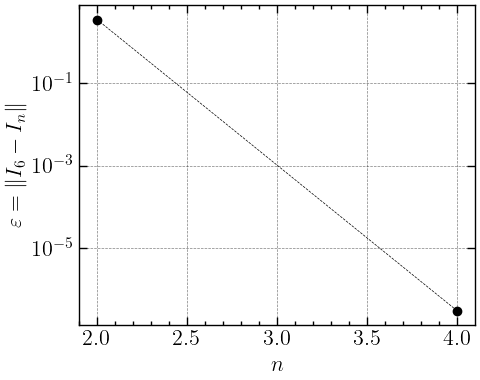

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)

n = [2, 4]
error = []

for i in range(len(solutions)-1):
    error.append(np.abs(solutions[len(solutions)-1] - solutions[i]))

ax.scatter(n, error, color="black")
ax.plot(n, error, "--", color="black")
ax.set_yscale("log")
ax.set_xlabel("$n$") ; ax.set_ylabel(r"$\varepsilon=\|I_{6}-I_{n}\|$") ; plt.rcParams["lines.linewidth"] = 0.5
plt.show()

Για τη μελέτη του ρυθμού σύγκλισης, αρκεί να υπολογιστεί το κλάσμα,
$$\frac{|u_{4}-u_{2}|}{|u_{6}-u_{4}|},$$
όπου $u_{n}$ η τιμή του ολοκληρώματος για $n$ σημεία.

In [27]:
rate = np.abs(solutions[1] - solutions[0]) / np.abs(solutions[2] -solutions[1])
rate

11891388.701038375

Η μεγάλη τιμή του ρυθμού σύγκγλισης υποδηλώνει την ταχύτατη σύγκλιση στην πραγματική τιμή.